<a href="https://colab.research.google.com/github/EmmanuelSalako/Decling-Ltd/blob/main/Room%20Occupancy%20Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Room Occupancy Estimation**



##Data Cleaning

In [ ]:
#Loading Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('Occupancy_Estimation.csv')

In [ ]:
data.sample(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
758,2017/12/22,17:49:23,26.25,25.94,25.94,26.31,150,237,180,11,0.21,0.13,0.20,0.07,865,1.680769,1,1,3
1059,2017/12/22,20:32:15,25.88,26.00,25.56,26.13,0,0,0,0,0.07,0.05,0.06,0.06,860,-3.434615,0,0,0
3706,2017/12/23,19:23:41,26.25,26.19,26.00,26.31,114,19,180,7,0.84,0.24,0.57,0.17,1025,-0.546154,0,0,2
1509,2017/12/23,00:25:05,25.38,25.38,24.94,25.75,0,0,0,0,0.06,0.05,0.05,0.06,375,-0.034615,0,0,0
811,2017/12/22,18:17:58,26.25,26.38,26.00,26.44,148,234,178,10,0.21,1.26,0.21,0.12,1040,2.619231,0,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [ ]:
data.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
cols = ['Date','Time']

data.drop(cols, axis=1, inplace=True)


In [ ]:
data

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [ ]:
data['Room_Occupancy_Count'].unique()

array([1, 2, 3, 0])

##Classification Algorithm

In [ ]:
x = data.drop('Room_Occupancy_Count', axis=1)
y = data['Room_Occupancy_Count']

x.shape, y.shape

((10129, 16), (10129,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8103, 16), (2026, 16), (8103,), (2026,))

In [ ]:
# spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class= 'ovr')))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
# evaluate each model in turn
from sklearn.model_selection import KFold

results = []
names = []
for name, model in models:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train, y_train, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.2f (%.2f)" % (name, scores.mean(), scores.std()))

LR 0.99 (0.00)
LDA 0.98 (0.01)
DT 0.99 (0.00)
KNN 1.00 (0.00)
NB 0.96 (0.00)
SVM 0.97 (0.01)


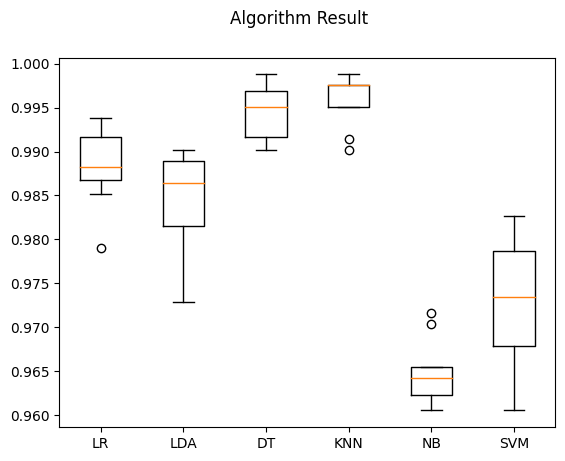

In [ ]:
# compare algorithm
fig = plt.figure()
fig.suptitle("Algorithm Result")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
#Evaluate Prediction

print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('')

print('Accuracy Score')
print(accuracy_score(y_test, predictions))
print('')

print('Classification Report')
print(classification_report(y_test, predictions, zero_division=1))
print('')

Confusion Matrix
[[1634    0    0    0]
 [  18   87    0    0]
 [   1    1  154    0]
 [   7    0    1  123]]

Accuracy Score
0.9861796643632774

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1634
           1       0.99      0.83      0.90       105
           2       0.99      0.99      0.99       156
           3       1.00      0.94      0.97       131

    accuracy                           0.99      2026
   macro avg       0.99      0.94      0.96      2026
weighted avg       0.99      0.99      0.99      2026




##Neural Network

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf, keras

In [ ]:
df = data.copy()
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [ ]:
X = df.drop('Room_Occupancy_Count', axis=1)
Y = data['Room_Occupancy_Count']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Get number of classes inside y_test
num_classes = len(Y.unique())

print('Number of classes:', num_classes)

Number of classes: 4


In [ ]:
Y_train = pd.get_dummies(Y_train)
Y_test = pd.get_dummies(Y_test)

In [ ]:
# Create the neural network model
model_neural = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the model
model_neural.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 12644 (49.39 KB)
Trainable params: 12644 (49.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model_neural.fit(
    X_train,
    Y_train,
    epochs=100,
    batch_size=32
)

Epoch 1/100
254/254 [==============================] - 4s 5ms/step - loss: 0.4203 - accuracy: 0.9452
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 0.1640 - accuracy: 0.9669
Epoch 3/100
254/254 [==============================] - 2s 8ms/step - loss: 0.1287 - accuracy: 0.9719
Epoch 4/100
254/254 [==============================] - 2s 9ms/step - loss: 0.1067 - accuracy: 0.9748
Epoch 5/100
254/254 [==============================] - 2s 8ms/step - loss: 0.0797 - accuracy: 0.9799
Epoch 6/100
254/254 [==============================] - 1s 5ms/step - loss: 0.0526 - accuracy: 0.9827
Epoch 7/100
254/254 [==============================] - 1s 5ms/step - loss: 0.0867 - accuracy: 0.9780
Epoch 8/100
254/254 [==============================] - 1s 2ms/step - loss: 0.0531 - accuracy: 0.9831
Epoch 9/100
254/254 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9840
Epoch 10/100
254/254 [==============================] - 1s 3ms/step - loss: 0.0399 - accura

In [ ]:
Y_pred = model_neural.predict(X_test)
Y_pred = np.round(Y_pred)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_bis = np.argmax(Y_test.copy(), axis=1)
confMatrix = confusion_matrix(Y_test_bis, Y_pred)
print(confMatrix)

64/64 [==============================] - 0s 2ms/step
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  157    6]
 [   3    0    1  136]]


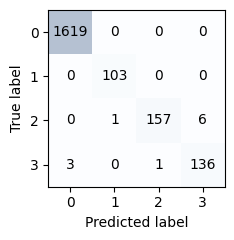

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confMatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confMatrix.shape[0]):
    for j in range(confMatrix.shape[1]):
        ax.text(x=j, y=i, s=confMatrix[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

In [ ]:
loss_test, accuracy_test = model_neural.evaluate(X_test, Y_test)

64/64 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9946


In [ ]:
print(f"Test accuracy : {accuracy_test}")

Test accuracy : 0.9945705533027649


## Comparing models performance

In [ ]:
neural_network_performance = accuracy_test
svc_performance = accuracy_score(y_test, predictions)

# Comparing SVC performance and Neural Network
accuracy_df = pd.DataFrame({'Accuracy score ':[neural_network_performance, svc_performance]}, index=["Neural network", "SVC"])
accuracy_df

,Accuracy score
Neural network,0.994571
SVC,0.986180


from matplotlib import pyplot as plt
_df_0['Accuracy score '].plot(kind='hist', bins=20, title='Accuracy score ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Accuracy score '].plot(kind='line', figsize=(8, 4), title='Accuracy score ')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Accuracy score ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: title={'center': 'Performance Comparison'}>

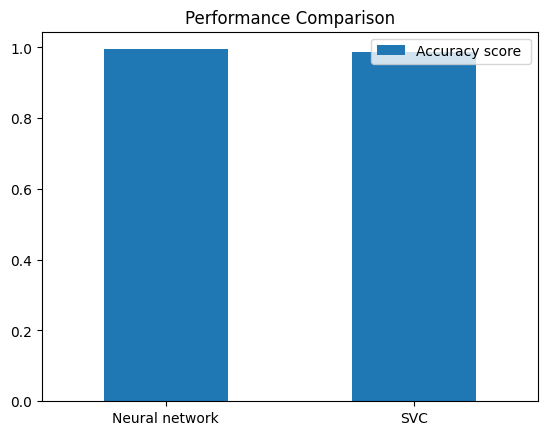

In [ ]:
accuracy_df.plot.bar(rot=0, title = 'Performance Comparison')

## Principal Component Analysis

In [ ]:
print("Dataset shape before applying pca :", X.shape)

Dataset shape before applying pca : (10129, 16)


In [ ]:
# Perform PCA on the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components => number of principal component
pca.fit(X)
X_pca = pca.transform(X)

- Principal Component analysis is a dimensionality reduction technique that is used to reduce the number of features in a dataset while retaining as much of the variance from the dataset.

In [ ]:
print("Dataset shape after applying pca :", X_pca.shape)

Dataset shape after applying pca : (10129, 2)


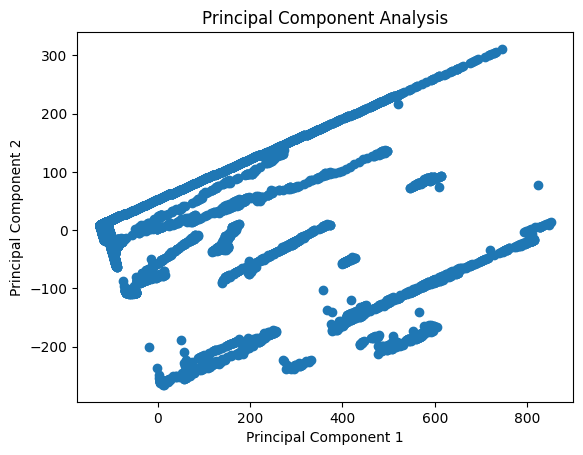

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

- PCA reduced the number of features from 16 to 2 while retaining 95% of the variance in the dataset. This means that 2 principal components capture the vast majority of the information in the original dataset

Explained variance ratio: [0.87114136 0.09556862]


Text(0, 0.5, 'Explained variance ratio')

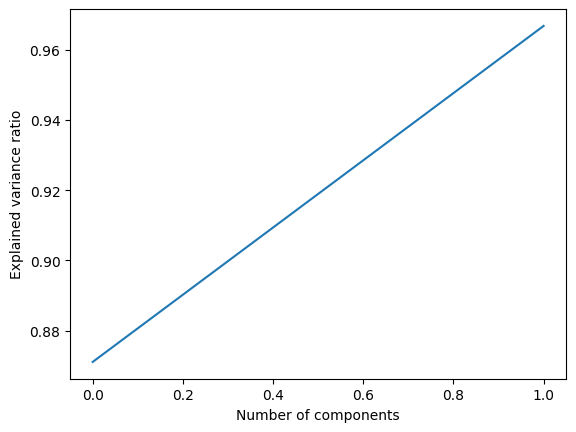

In [ ]:
# Explain outcome of PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

- The variance ration is a measure of how much variance each principal component captures. The first principal component captures the most variance which here captured 80%, and the second captured 15% of the variance. This signifies that the first principal component is more important that the second one.

## Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df_feature_selection = data.copy()

print(f"Number of features before feature selection : {len(df_feature_selection.columns)}")

Number of features before feature selection : 17


In [ ]:
# Checking for negative values
df_feature_selection.lt(0).sum()

S1_Temp                    0
S2_Temp                    0
S3_Temp                    0
S4_Temp                    0
S1_Light                   0
S2_Light                   0
S3_Light                   0
S4_Light                   0
S1_Sound                   0
S2_Sound                   0
S3_Sound                   0
S4_Sound                   0
S5_CO2                     0
S5_CO2_Slope            3128
S6_PIR                     0
S7_PIR                     0
Room_Occupancy_Count       0
dtype: int64

In [ ]:
# Converting all negative values to positive for 'S5_CO2_Slope' column.
df_feature_selection['S5_CO2_Slope'] = df_feature_selection['S5_CO2_Slope'].apply(lambda x: abs(x))

In [ ]:
X_feature_selection = df_feature_selection.drop('Room_Occupancy_Count', axis=1)
Y_feature_selection = df_feature_selection['Room_Occupancy_Count']

selector = SelectKBest(chi2, k=11)
selector.fit(X_feature_selection, Y_feature_selection)

SelectKBest(k=11, score_func=<function chi2 at 0x7955e7e7e9e0>)

In [ ]:
# what are scores for the features
for i in range(len(selector.scores_)):
    print('Feature %d: %f' % (i, selector.scores_[i]))

Feature 0: 25.061327
Feature 1: 61.498169
Feature 2: 31.519314
Feature 3: 15.270548
Feature 4: 900088.778818
Feature 5: 1119124.475578
Feature 6: 649052.237805
Feature 7: 55600.603508
Feature 8: 2238.723725
Feature 9: 2055.150040
Feature 10: 3234.967874
Feature 11: 321.885996
Feature 12: 389728.180390
Feature 13: 4899.124401
Feature 14: 3863.888432
Feature 15: 4673.327863


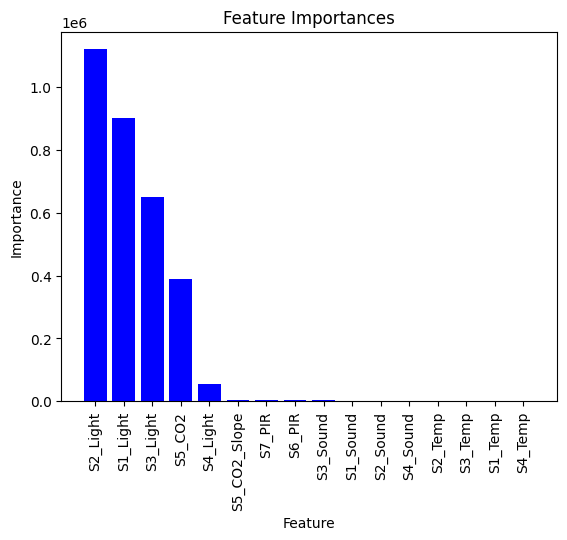

In [ ]:
# Display in a graph the feature importance of the data features
importances = selector.scores_
indices = np.argsort(importances)[::-1]
plt.bar(range(len(indices)), importances[indices], color='blue', align='center')
plt.xticks(range(len(indices)), data.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
selected_features = X_feature_selection.columns[selector.get_support()]
print(selected_features)
print(f"Number of features after feature selection : {len(selected_features)}")

Index(['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound',
       'S3_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')
Number of features after feature selection : 11


In [ ]:
df_feature_selection = df_feature_selection[selected_features]
print(df_feature_selection.head())

   S1_Light  S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  \
0       121        34        53        40      0.08      0.19      0.06   
1       121        33        53        40      0.93      0.05      0.06   
2       121        34        53        40      0.43      0.11      0.08   
3       121        34        53        40      0.41      0.10      0.10   
4       121        34        54        40      0.18      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  
0     390      0.769231       0       0  
1     390      0.646154       0       0  
2     390      0.519231       0       0  
3     390      0.388462       0       0  
4     390      0.253846       0       0  


In [ ]:
x_train_selection, x_test_selection, y_train_selection, y_test_selection = train_test_split(df_feature_selection, Y_feature_selection, test_size=0.2, random_state=23)

In [ ]:
model_feature_selection = SVC(gamma='auto')
model_feature_selection.fit(x_train_selection, y_train_selection)
predictions_feature_selection = model_feature_selection.predict(x_test_selection)

In [ ]:
svc_performance_feature_selection = accuracy_score(y_test_selection, predictions_feature_selection)
print(f'SVC accuracy score after feature selection : ', svc_performance_feature_selection)

SVC accuracy score after feature selection :  0.9802566633761106


### Comparing model accuracy with and without feature importance

In [ ]:
svc_accuracy_df = pd.DataFrame({'Accuracy score ':[svc_performance, svc_performance_feature_selection]}, index=["SVC without feature selection", "SVC with feature selection"])
svc_accuracy_df

,Accuracy score
SVC without feature selection,0.986180
SVC with feature selection,0.980257


<Axes: title={'center': 'Performance Comparison'}>

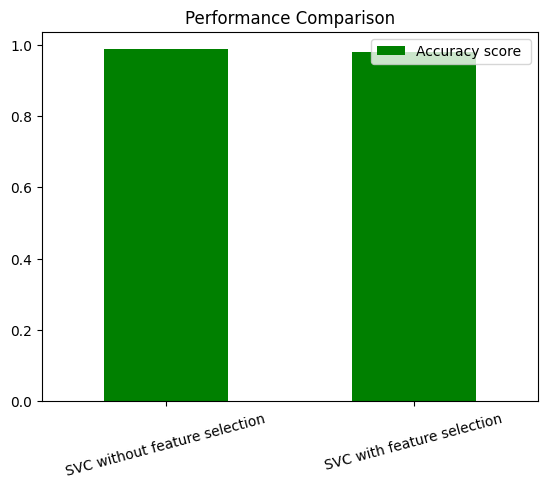

In [ ]:
svc_accuracy_df.plot.bar(rot=15, title = 'Performance Comparison', color=["green"])

## Explainable AI

### Model Specific Approach - Decision Tree

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
explainer_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
explainer_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [ ]:
print(f"Accuracy score: {explainer_model.score(x_test, y_test)}")

Accuracy score: 0.9713721618953604


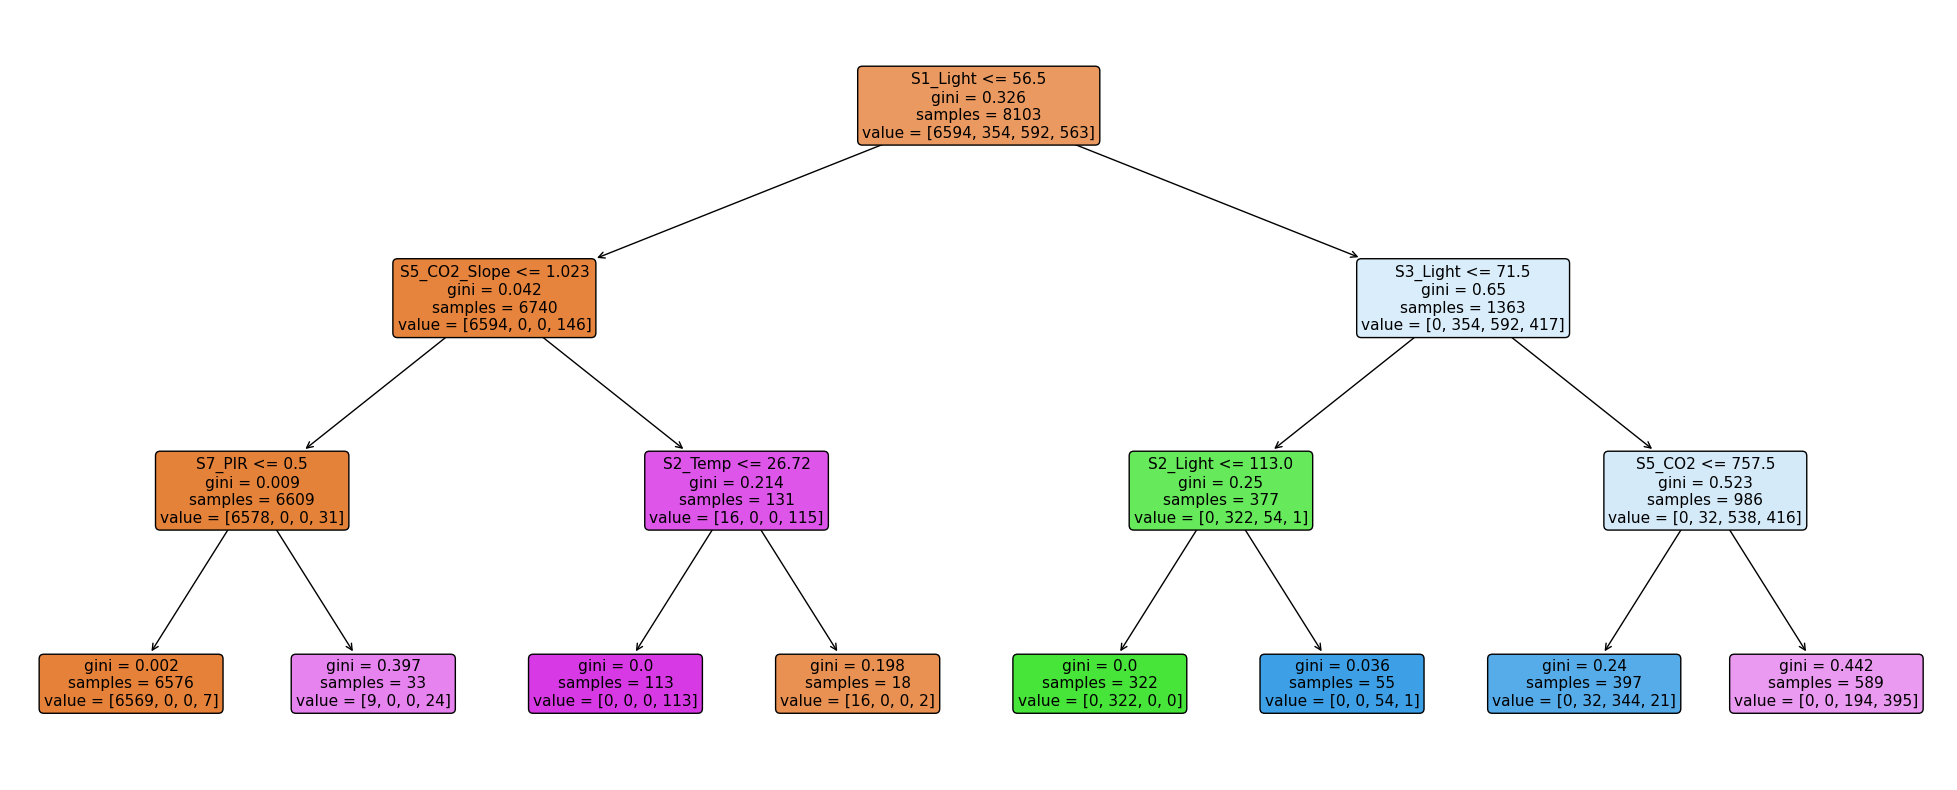

In [ ]:
plt.figure(figsize=(25, 10))
plot_tree(
    explainer_model,
    filled=True,
    feature_names=data.columns.to_list(),
    rounded=True
    )
plt.minorticks_off()

### Model Agnostic Approach - SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 12.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9e3dad7a0675da4b722bd11efe451deed5b2e2b6752a796fcf7bc1f9933f49c2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(explainer_model)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

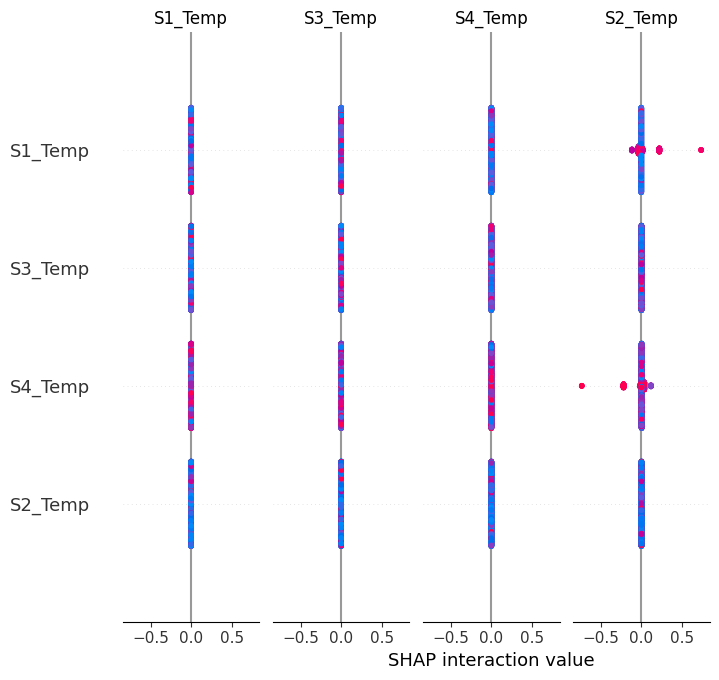

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

The combined effect of S1 Temp and S2 Temp is stronger than the sum of their individual effect, hence the interaction value is positive. This indicates that features S1 Temp and S2 Temp reinforce each other's influence on the prediction.

While, S4 Temp and S2 Temp have a weaker combined effect on the models prediction hence the negative skew in their interaction value.

Every other feature has a balanced combined effect on the feature.